<h1>Problem Statement</h1>

In [153]:
# Import
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [154]:
data = pd.read_csv("./covid_19_data.csv")
mob = pd.read_csv("2020_ID_Region_Mobility_Report.csv")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [155]:
data.drop(['Province/State', 'Last Update', 'SNo'], axis=1, inplace=True)
# data.loc[data['Province/State'].isnull()]


In [156]:
global_mob = mob.loc[mob['sub_region_1'].isnull()]
global_mob

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-15,-2.0,-2.0,-8.0,1.0,5,1
1,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-16,-3.0,-3.0,-7.0,-4.0,2,2
2,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-17,-3.0,-4.0,-7.0,-1.0,3,1
3,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-18,-3.0,-2.0,-4.0,1.0,2,1
4,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-02-19,-3.0,-4.0,-3.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-12-27,-18.0,-1.0,-1.0,-23.0,-6,8
317,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-12-28,-12.0,6.0,4.0,-26.0,-29,12
318,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-12-29,-15.0,3.0,1.0,-26.0,-31,12
319,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,2020-12-30,-12.0,9.0,4.0,-22.0,-31,11


In [157]:
# confirm = [data.loc[data['Country/Region'] == i]['Confirmed'].sum() for i in data['Country/Region'].unique()]
# death = [data.loc[data['Country/Region'] == i]['Deaths'].sum() for i in data['Country/Region'].unique()]
# recover = [data.loc[data['Country/Region'] == i]['Recovered'].sum() for i in data['Country/Region'].unique()]

In [158]:
data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,05/29/2021,Ukraine,102641.0,2335.0,95289.0
306425,05/29/2021,Netherlands,29147.0,245.0,0.0
306426,05/29/2021,Mainland China,1364.0,1.0,1324.0
306427,05/29/2021,Ukraine,87550.0,1738.0,83790.0


In [159]:
indoDf = data.loc[data['Country/Region'] == 'Indonesia']
indoDf.reset_index(drop=True, inplace=True)
indoDf.drop(['Country/Region'], axis=1, inplace=True)
df = pd.DataFrame(indoDf)
df

C:\Users\adiha\AppData\Local\Temp\ipykernel_3716\1541026335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoDf.drop(['Country/Region'], axis=1, inplace=True)


,ObservationDate,Confirmed,Deaths,Recovered
0,03/02/2020,2.0,0.0,0.0
1,03/03/2020,2.0,0.0,0.0
2,03/04/2020,2.0,0.0,0.0
3,03/05/2020,2.0,0.0,0.0
4,03/06/2020,4.0,0.0,0.0
...,...,...,...,...
449,05/25/2021,1786187.0,49627.0,1642074.0
450,05/26/2021,1791221.0,49771.0,1645263.0
451,05/27/2021,1797499.0,49907.0,1649187.0
452,05/28/2021,1803361.0,50100.0,1654557.0


In [160]:
# df['Confirmed']=df['Confirmed'].replace(0, 0.0001)
# df['Deaths']=df['Deaths'].replace(0, 0.0001)
# df['Recovered']=df['Recovered'].replace(0, 0.0001)

In [161]:
incConfirmed = []
incDeaths = []
incRecovered = []
conBefore = 0
deaBefore = 0
recBefore = 0

for index, row in df.iterrows():
    incConfirmed.append(row['Confirmed'] - conBefore)
    incDeaths.append(row['Deaths'] - deaBefore)
    incRecovered.append(row['Recovered'] - recBefore)
    conBefore = row['Confirmed']
    deaBefore = row['Deaths']
    recBefore = row['Recovered']

df['Confirmed Inc.'] = incConfirmed
df['Death Inc.'] = incDeaths
df['Recovered Inc.'] = incRecovered

#calculate percent change between rows in pandas DataFrame
# df['Confirmed Inc.'] = df['Confirmed'].pct_change()*100
# df['Death Inc.']= df['Deaths'].pct_change()*100
# df['Recovered Inc.'] = df['Recovered'].pct_change()*100

In [162]:
for i in range(len(df)):
    # print(i)
    # print(indoDf['ObservationDate'][i])
    bulan, tanggal, tahun = df['ObservationDate'][i].split("/")
    df['ObservationDate'][i] = f"{tahun}-{bulan}-{tanggal}"
# len(indoDf)
df
# indoDf.iloc[[0]]['ObservationDate'][0]

C:\Users\adiha\AppData\Local\Temp\ipykernel_3716\3400472366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ObservationDate'][i] = f"{tahun}-{bulan}-{tanggal}"


,ObservationDate,Confirmed,Deaths,Recovered,Confirmed Inc.,Death Inc.,Recovered Inc.
0,2020-03-02,2.0,0.0,0.0,2.0,0.0,0.0
1,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,2.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-06,4.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
449,2021-05-25,1786187.0,49627.0,1642074.0,5060.0,172.0,3795.0
450,2021-05-26,1791221.0,49771.0,1645263.0,5034.0,144.0,3189.0
451,2021-05-27,1797499.0,49907.0,1649187.0,6278.0,136.0,3924.0
452,2021-05-28,1803361.0,50100.0,1654557.0,5862.0,193.0,5370.0


In [163]:
# Data Merging
data_merge = pd.merge(left= df[["ObservationDate", "Confirmed Inc.", "Death Inc.", "Recovered Inc."]], right= global_mob[["date", "retail_and_recreation_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]], left_on="ObservationDate", right_on="date")
data_merge

,ObservationDate,Confirmed Inc.,Death Inc.,Recovered Inc.,date,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-02,2.0,0.0,0.0,2020-03-02,5.0,3.0,12.0,5,0
1,2020-03-03,0.0,0.0,0.0,2020-03-03,3.0,2.0,10.0,5,0
2,2020-03-04,0.0,0.0,0.0,2020-03-04,0.0,-1.0,4.0,4,1
3,2020-03-05,0.0,0.0,0.0,2020-03-05,4.0,3.0,8.0,4,0
4,2020-03-06,2.0,0.0,0.0,2020-03-06,2.0,3.0,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...
300,2020-12-27,6528.0,243.0,6983.0,2020-12-27,-18.0,-23.0,-1.0,-6,8
301,2020-12-28,5854.0,215.0,6302.0,2020-12-28,-12.0,-26.0,6.0,-29,12
302,2020-12-29,7903.0,251.0,6805.0,2020-12-29,-15.0,-26.0,3.0,-31,12
303,2020-12-30,8002.0,241.0,6958.0,2020-12-30,-12.0,-22.0,9.0,-31,11


In [164]:
# Data Scaling
# data_merge['Confirmed Inc.'] = preprocessing.minmax_scale(data_merge['Confirmed Inc.'], feature_range=(0, 100))
# data_merge['Death Inc.'] = preprocessing.minmax_scale(data_merge['Death Inc.'], feature_range=(0, 100))
# data_merge['Recovered Inc.'] = preprocessing.minmax_scale(data_merge['Recovered Inc.'], feature_range=(0, 100))
# data_merge['transit_stations_percent_change_from_baseline'] = preprocessing.minmax_scale(data_merge['transit_stations_percent_change_from_baseline'], feature_range=(0, 1))

In [165]:
data_merge

,ObservationDate,Confirmed Inc.,Death Inc.,Recovered Inc.,date,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-02,2.0,0.0,0.0,2020-03-02,5.0,3.0,12.0,5,0
1,2020-03-03,0.0,0.0,0.0,2020-03-03,3.0,2.0,10.0,5,0
2,2020-03-04,0.0,0.0,0.0,2020-03-04,0.0,-1.0,4.0,4,1
3,2020-03-05,0.0,0.0,0.0,2020-03-05,4.0,3.0,8.0,4,0
4,2020-03-06,2.0,0.0,0.0,2020-03-06,2.0,3.0,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...
300,2020-12-27,6528.0,243.0,6983.0,2020-12-27,-18.0,-23.0,-1.0,-6,8
301,2020-12-28,5854.0,215.0,6302.0,2020-12-28,-12.0,-26.0,6.0,-29,12
302,2020-12-29,7903.0,251.0,6805.0,2020-12-29,-15.0,-26.0,3.0,-31,12
303,2020-12-30,8002.0,241.0,6958.0,2020-12-30,-12.0,-22.0,9.0,-31,11


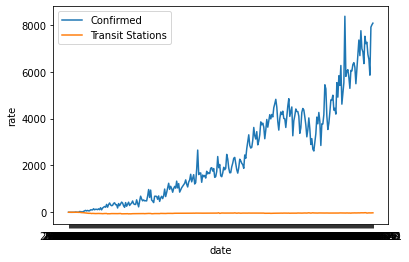

In [166]:
# data_merge.plot(x="ObservationDate", y="Confirmed Inc.", kind="line")
# data_merge.plot(x="ObservationDate", y="Death Inc.", kind="line")

fig,ax = plt.subplots()

ax.plot(data_merge["date"],data_merge["Confirmed Inc."], label="Confirmed")
ax.plot(data_merge["date"],data_merge["transit_stations_percent_change_from_baseline"], label="Transit Stations")

ax.set_xlabel("date")
ax.set_ylabel("rate")
ax.legend(loc='best')